<a href="https://colab.research.google.com/github/COSMIC-2318/nurse-stress-detection/blob/master/nurse_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/nurse_data.csv"

nurse = pd.read_csv(path, on_bad_lines='skip', engine='python')

In [ ]:
nurse.tail()

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
11509046,-16.0,-56.0,24.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.875000064,2.0
11509047,-8.0,-50.0,27.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.906249984,2.0
11509048,-28.0,-36.0,28.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.937499904,2.0
11509049,-29.0,-29.0,30.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.968750080,2.0
11509050,-22.0,-24.0,29.0,3.374543,88.33,33.75,F5,2020-07-23 17:29:00.000000000,2.0


In [ ]:
nurse.head()

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0


In [ ]:
nurse.dtypes

,0
X,float64
Y,float64
Z,float64
EDA,float64
HR,float64
TEMP,float64
id,object
datetime,object
label,float64


In [ ]:
for i in nurse.columns:
    print(i,':',"\n",nurse[i].unique(),"\n")


X : 
 [ -13.  -20.  -31.  -47.  -67.   -9.    9.   -6.   -1.  -41.  -52.  -22.
  -26.  -24.  -15.  -29.    1.   14.   11.   -5.   -8.  -17.  -12.  -27.
   33.   17.   -3.  -74. -101.  -30.    2.   -2.  -43.  -49.  -34.  -16.
  -32.  -36.  -40.  -44.  -45.  -48.  -57.  -54.  -46.  -51.  -21.  -23.
  -33.  -70.  -77.  -68.  -60.  -64.  -65.  -58.  -61.  -75.  -55.  -56.
  -42.  -50.  -63.  -38.  -62.  -39.  -66.  -76.  -71.  -69.  -53.  -35.
  -37.  -73.  -96.  -81.  -59.  -91.  -84.  -83.  -99.  -72.  -25.  -10.
  -11.  -18.  -14.   -7.    0.   -4.  -19.  -28.    3.    4.    6.    5.
    7.   13.   12.   25.   19. -112.  -87.  -88.    8.   27.   20.  -79.
 -126. -115.  -90.  -85.  -98.  -78.   10.   15.   22.  -80.  -89.  -86.
  -82.   16. -103.  -97. -122.  -94. -111.  -93. -116. -109.   18. -100.
  -92. -102. -108.  -95.   26.   24.   48.   36.   40.   55.   60.   52.
   21.   31.   30.   32.   37.   41.   53.   29.   39.   45.   54.   47.
   43.   35.   38.   28.   34.   23.   42.   

In [ ]:
nurse.isnull().sum()

,0
X,0
Y,0
Z,0
EDA,0
HR,0
TEMP,0
id,0
datetime,0
label,0


/tmp/ipython-input-3871929492.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=nurse.EDA,x=nurse.label,palette='rainbow')


KeyboardInterrupt: 

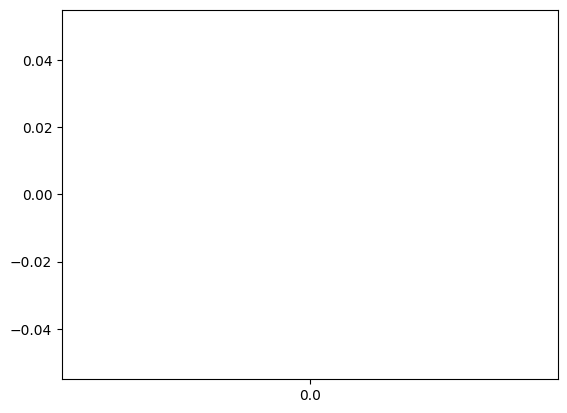

In [ ]:
sns.boxenplot(y=nurse.EDA,x=nurse.label,palette='rainbow')
plt.show()

In [ ]:
nurse = nurse.drop(columns=['X','Y','Z','id'])
nurse.head()

,EDA,HR,TEMP,datetime,label
0,6.769995,99.43,31.17,2020-07-08 14:03:00.000000000,2.0
1,6.769995,99.43,31.17,2020-07-08 14:03:00.031249920,2.0
2,6.769995,99.43,31.17,2020-07-08 14:03:00.062500096,2.0
3,6.769995,99.43,31.17,2020-07-08 14:03:00.093750016,2.0
4,6.769995,99.43,31.17,2020-07-08 14:03:00.124999936,2.0


In [ ]:
nurse['datetime'] = pd.to_datetime(nurse['datetime'], format='mixed')
nurse['shift'] = nurse['datetime'].dt.hour
nurse.head()

,EDA,HR,TEMP,datetime,label,shift
0,6.769995,99.43,31.17,2020-07-08 14:03:00.000000000,2.0,14
1,6.769995,99.43,31.17,2020-07-08 14:03:00.031249920,2.0,14
2,6.769995,99.43,31.17,2020-07-08 14:03:00.062500096,2.0,14
3,6.769995,99.43,31.17,2020-07-08 14:03:00.093750016,2.0,14
4,6.769995,99.43,31.17,2020-07-08 14:03:00.124999936,2.0,14


In [ ]:
nurse['shift'] = nurse['shift'].apply(lambda x: 0 if 6 <= x < 18 else 1)
nurse.head()

,EDA,HR,TEMP,datetime,label,shift
0,6.769995,99.43,31.17,2020-07-08 14:03:00.000000000,2.0,0
1,6.769995,99.43,31.17,2020-07-08 14:03:00.031249920,2.0,0
2,6.769995,99.43,31.17,2020-07-08 14:03:00.062500096,2.0,0
3,6.769995,99.43,31.17,2020-07-08 14:03:00.093750016,2.0,0
4,6.769995,99.43,31.17,2020-07-08 14:03:00.124999936,2.0,0


In [ ]:
nurse = nurse.drop(columns=['datetime'])

In [ ]:
nurse.head()

,EDA,HR,TEMP,label,shift
0,6.769995,99.43,31.17,2.0,0
1,6.769995,99.43,31.17,2.0,0
2,6.769995,99.43,31.17,2.0,0
3,6.769995,99.43,31.17,2.0,0
4,6.769995,99.43,31.17,2.0,0


In [ ]:
#sns.pairplot(nurse,hue='label',palette='cool')
#plt.show()

In [ ]:
nurse.describe()

,EDA,HR,TEMP,label,shift
count,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07
mean,3.502127e+00,8.576090e+01,3.223435e+01,1.554202e+00,3.673351e-01
std,5.656541e+00,1.419642e+01,2.260516e+00,7.891827e-01,4.820789e-01
min,0.000000e+00,5.100000e+01,2.409000e+01,0.000000e+00,0.000000e+00
25%,2.242060e-01,7.672000e+01,3.019000e+01,1.000000e+00,0.000000e+00
50%,1.157407e+00,8.390000e+01,3.257000e+01,2.000000e+00,0.000000e+00
75%,4.077436e+00,9.310000e+01,3.425000e+01,2.000000e+00,1.000000e+00
max,5.976071e+01,1.802300e+02,3.659000e+01,2.000000e+00,1.000000e+00


In [ ]:
label_counts = nurse['label'].value_counts().sort_index()
print("Frequency of each label:")
print(label_counts)

Frequency of each label:
label
0.0    2162246
1.0     806222
2.0    8540583
Name: count, dtype: int64


In [ ]:
# Calculate percentages
label_proportions = nurse['label'].value_counts(normalize=True).sort_index() * 100
print("\nPercentage distribution:")
print(label_proportions)


Percentage distribution:
label
0.0    18.787353
1.0     7.005113
2.0    74.207535
Name: proportion, dtype: float64


In [ ]:
# Define the target count based on the minority class (Label 1.0)
target_count = 806222

# Perform random undersampling for each group
# We use a random_state for reproducibility
balanced_nurse = nurse.groupby('label').apply(
    lambda x: x.sample(n=target_count, random_state=42)
).reset_index(drop=True)

# Shuffle the final dataset so the labels are not ordered
balanced_nurse = balanced_nurse.sample(frac=1, random_state=42).reset_index(drop=True)

# Verification of the new distribution
print("Balanced Label Distribution:")
print(balanced_nurse['label'].value_counts())

/tmp/ipython-input-4126224766.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_nurse = nurse.groupby('label').apply(


Balanced Label Distribution:
label
2.0    806222
1.0    806222
0.0    806222
Name: count, dtype: int64


In [ ]:
balanced_nurse.describe()

,EDA,HR,TEMP,label,shift
count,2.418666e+06,2.418666e+06,2.418666e+06,2.418666e+06,2.418666e+06
mean,3.234727e+00,8.618850e+01,3.201236e+01,1.000000e+00,4.453658e-01
std,5.612559e+00,1.429130e+01,2.310718e+00,8.164967e-01,4.970062e-01
min,0.000000e+00,5.100000e+01,2.409000e+01,0.000000e+00,0.000000e+00
25%,2.383560e-01,7.637000e+01,3.003000e+01,0.000000e+00,0.000000e+00
50%,8.140100e-01,8.407000e+01,3.215000e+01,1.000000e+00,0.000000e+00
75%,3.619550e+00,9.385000e+01,3.411000e+01,2.000000e+00,1.000000e+00
max,5.948647e+01,1.802300e+02,3.659000e+01,2.000000e+00,1.000000e+00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. Define Features (EDA, TEMP, HR, SHIFT) and Target
X = balanced_nurse[['EDA', 'TEMP', 'HR', 'shift']]
y = balanced_nurse['label']

# 2. Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_encoded = to_categorical(y)  # Converts 0, 1, 2 into [1,0,0], [0,1,0], [0,0,1]

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [ ]:
import joblib
# This must be the scaler fitted on the 5-column X_train
joblib.dump(scaler, 'stress_scaler_1.pkl')
model.save('stress_detection_model.keras')


In [ ]:
model = Sequential([
    # Input Layer & First Hidden Layer
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),

    # Second Hidden Layer
    Dense(32, activation='relu'),
    Dropout(0.2),

    # Third Hidden Layer
    Dense(16, activation='relu'),

    # Output Layer (3 nodes for labels 0, 1, 2)
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=1024, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.5253 - loss: 0.9494 - val_accuracy: 0.6606 - val_loss: 0.7538
Epoch 2/200
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6334 - loss: 0.7899 - val_accuracy: 0.7066 - val_loss: 0.6777
Epoch 3/200
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6650 - loss: 0.7354 - val_accuracy: 0.7201 - val_loss: 0.6441
Epoch 4/200
1512/1512 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6770 - loss: 0.7104 - val_accuracy: 0.7232 - val_loss: 0.6290
Epoch 5/200
1497/1512 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6839 - loss: 0.6958

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print Detailed Report
print("Validation Report:")
print(classification_report(y_true, y_pred, target_names=['Baseline', 'Stress', 'Amusement/Activity']))

In [ ]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, 'stress_scaler.pkl')

print("Scaler saved successfully.")

In [ ]:
# Save the entire model
model.save('stress_detection_model.keras')

print("Deep Learning model saved successfully.")

In [ ]:
"""import joblib
from tensorflow.keras.models import load_model
import numpy as np

# 1. Load the assets
loaded_scaler = joblib.load('stress_scaler.pkl')
loaded_model = load_model('stress_detection_model.keras')

# 2. Prepare new data (Example: EDA, TEMP, HR, Shift)
new_data = np.array([[5.2, 31.5, 110, 0]])

# 3. SCALE THE NEW DATA using the LOADED scaler
new_data_scaled = loaded_scaler.transform(new_data)

# 4. Predict
prediction_prob = loaded_model.predict(new_data_scaled)
predicted_label = np.argmax(prediction_prob)

print(f"Predicted Stress Category: {predicted_label}")"""

In [ ]:
"""model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)), # Corrected input_shape
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=1024, validation_split=0.2)"""

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import joblib
import platform

print("--- Environment & Library Versions ---")
print(f"Python:     {platform.python_version()}")
print(f"Pandas:     {pd.__version__}")
print(f"NumPy:      {np.__version__}")
print(f"Scikit-Learn:{sklearn.__version__}")
print(f"TensorFlow: {tf.__version__}")
print(f"Joblib:     {joblib.__version__}")
print("--------------------------------------")

--- Environment & Library Versions ---
Python:     3.12.12
Pandas:     2.2.2
NumPy:      2.0.2
Scikit-Learn:1.6.1
TensorFlow: 2.19.0
Joblib:     1.5.3
--------------------------------------
